# 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` nalezneme data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

Dataset `locations.csv` poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

☝️ Každý dataset může **stejné zvíře obsahovat víckrát**. 

## Obsah projektu

**✨ Příprava dat**
* Importujme potřebné balíčky.
* Načtěme si datasety intakes a outcomes z příslušných csv souborů.
* Seznamime se s oběma datasety.
* Vyčistěme a zkonvertujme data:
  * Zjistěme jakým způsobem jsou v datasetu uváděny chybějící hodnoty a přepišme je na NaN.
  * Zkonvertujme kategorické příznaky na typ category.
  * Převeďme příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďme příznak DateTime na typ datetime64.
  * Proveďme všechny další úpravy (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky**

* Popišme příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberme si tři další příznaky a popišme je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberme si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popišme tento vztah pomocí bivariačních deskriptivních statistik.

**❓ Vlastní otázky**

Pomocí vhodných vizualizací zodpovíme na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?
* Jake jsou top 10 plemen adaptovanych zvirat?
* Kolik koček a psů bylo přijato do střediska v roce 2021? (v každém měsíci)
* Kolik zvířat, která přišla do centra nemocná, v historii centra uhynulo? Ve kterém měsíci uhynulo nejvíce zvířat?

## Příprava dat

### Import knnihoven a nacteni dat

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.patches as patch
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
# Without next line chart rendering does not work in Jupyter notebooks sometimes
%matplotlib inline 

In [176]:
# Reading files
intake = pd.read_csv("intakes.csv")
outcome = pd.read_csv("outcomes.csv")

### Intakes

In [177]:
# Information about 'intake' DataFrame
display(intake.head(6))
intake.tail(6)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,02/18/2017 12:46:00 PM,February 2017,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
138579,A854552,Coco,04/05/2022 03:43:00 PM,April 2022,641 Tillery Street in Austin (TX),Stray,Normal,Dog,Intact Female,9 months,Pit Bull Mix,Black/White
138580,A856010,Snow,04/27/2022 07:54:00 AM,April 2022,4434 Frontier Trail in Austin (TX),Owner Surrender,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair,White
138581,A855811,A855811,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Labrador Retriever Mix,Brown Brindle/Black
138582,A855815,A855815,04/23/2022 01:32:00 PM,April 2022,4414 Dove Dr in Austin (TX),Stray,Normal,Dog,Intact Female,2 months,Labrador Retriever Mix,Brown/Black
138583,A855818,*Pumbaa,04/23/2022 02:44:00 PM,April 2022,10827 Fm 1820 in Travis (TX),Stray,Normal,Dog,Intact Male,3 years,Anatol Shepherd/German Shepherd,Brown
138584,A854552,Coco,04/21/2022 12:24:00 PM,April 2022,641 Tillery Street in Austin (TX),Stray,Normal,Dog,Intact Female,9 months,Pit Bull Mix,Black/White


Pomoci funkce tail() a head() vidime, ze mame 12 priznaku:
1.  Animal ID        - Identifikator, kazde zvire ma unikalni identifikator
2.  Name             - Jmeno zvire
3.  DateTime         - datum a cas, kdy bylo zaregistrovano
4.  MonthYear        - mesic a rok, kdy bylo zaregistrovano
5.  Found Location   - adresa, kde bylo zvíře nalezeno
6.  Intake Type      - tento priznak určuje, jak se zvíře do střediska dostalo (bylo zatoulané, darované majiteli atd.).
7.  Intake Condition - v jakém stavu bylo zvíře, když přišlo do střediska (nemocné, normální atd.)
8.  Animal Type      - typ zvire (pec,kocka atd.)
9.  Sex upon Intake  - tento znak určuje pohlaví zvířete a to, zda bylo vykastrováno.
10. Age upon Intake  - věk zvířete v okamžiku registrace.
11. Breed            - plemeno zvířete
12. Color            - barva zvířete

* Sloupec 'MonthYear' nam rika, ze dataset byl pripraven spise pro cloveka. V sousednim sloupcu 'DateTime' mame presnu datu a cas.

Podivame se na vystup funkci describe() a info():

In [178]:
intake.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,138585,97316,138585,138585,138585,138585,138585,138585,138584,138585,138585,138585
unique,123890,23544,97442,103,58367,6,15,5,5,54,2741,616
top,A721033,Max,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,624,64,2189,26051,95283,119320,78145,45635,23667,32194,14470


In [179]:
intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Vidime, ze mame 138585 radku a 12 priznaku. Vsechny se interpretovaly jako 'object', ale 'DateTime' a 'MonthYear' se da konvertovat na datovy typ 'datetime'.


Vzhledem k počtu jedinečných hodnot ( z describe() ) a nenulovych hodnot (z info() ), mam nazor jak vyhodne priznaky rozdělit na typy:
* nominální   ('Name', 'Found Location', 'Breed', 'Color'). Muzou nabyvat hodne textovych hodnot, jsou jenom porovnatelne podle = nebo != .
* intervalové ('DateTime', 'MonthYear', 'Age upon Intake' (posledni ale jen po uprave) ). Muzeme je porovnavat a pripadne odecist.
* kategorické ( 'Intake Type', 'Intake Condition', 'Animal Type' ). Maji omezeny pocet moznych znaceni, navic knihovny pro vizualizaci umí interpretovat kategorické příznaky a použít příslušné statistické modely.

Je mozne zaradit 'Sex upon Intake' do kategorické, ale musime davat pozor na jednu null hodnotu.



### Outcomes

In [180]:
# Information about 'intake' DataFrame
display(outcome.head(6))
outcome.tail(6)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
5,A659412,Princess,10/05/2020 02:37:00 PM,Oct 2020,03/24/2013,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Shorthair Mix,Brown


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
138763,A855746,Oso,04/26/2022 05:27:00 PM,Apr 2022,08/22/2021,Adoption,NaN,Dog,Neutered Male,8 months,Shih Tzu,White/Tan
138764,A855717,NaN,04/26/2022 05:15:00 PM,Apr 2022,01/26/2022,Adoption,NaN,Cat,Neutered Male,2 months,Maine Coon,Blue
138765,A855721,Isis,04/26/2022 06:07:00 PM,Apr 2022,01/07/2022,Adoption,NaN,Dog,Spayed Female,3 months,Catahoula,Brown Merle/White
138766,A855973,A855973,04/26/2022 06:41:00 PM,Apr 2022,04/24/2022,Transfer,Partner,Cat,Intact Female,2 days,Domestic Shorthair,Cream Tabby
138767,A547142,Foxy,04/26/2022 06:04:00 PM,Apr 2022,06/19/2006,Transfer,Partner,Dog,Spayed Female,15 years,Pomeranian,Tan
138768,A855426,*Barbossa,04/26/2022 06:41:00 PM,Apr 2022,03/18/2022,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair,White


Pomoci funkce tail() a head() vidime, ze mame 12 priznaku:
1.  Animal ID        - Identifikator, kazde zvire ma unikalni identifikator
2.  Name             - Jmeno zvire
3.  DateTime         - datum a cas, kdy bylo zaregistrovano
4.  MonthYear        - mesic a rok, kdy bylo zaregistrovano
5.  Date of Birth    - datum, kdy zvire se narodilo
6.  Outcome Type     - tento priznak určuje, jak se zvíře ze střediska odeslo (byla adoptována, přemístěna, eutanazie atd.)
7.  Outcome Subtype  - definuje podtyp (pěstoun, riziko vztekliny, utrpení atd.) 
8.  Animal Type      - typ zvire (pec,kocka atd.)
9.  Sex upon Outcome - tento znak určuje pohlaví zvířete a to, zda bylo vykastrováno
10. Age upon Outcome - věk zvířete v okamžiku opuštění střediska
11. Breed            - plemeno zvířete
12. Color            - barva zvířete

Navic:
* Mame nekolik novych priznaku - 'Date of Birth', 'Outcome Subtype'
* Nekteri priznaky se zmizili - 'Intake Condition', 'Intake Type'
* Ostatni se zustaly nebo zmenily nazev podle datasetu - 'Age upon Outcome' a 'Age upon Intake'

In [181]:
# What's the difference according to attributes?
set(outcome.columns) - set(intake.columns)

{'Age upon Outcome',
 'Date of Birth',
 'Outcome Subtype',
 'Outcome Type',
 'Sex upon Outcome'}

In [182]:
set(intake.columns) - set(outcome.columns)

{'Age upon Intake',
 'Found Location',
 'Intake Condition',
 'Intake Type',
 'Sex upon Intake'}

Tedy prejdeme do info a describe :

In [183]:
display(outcome.describe())
outcome.info()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,138769,97514,138769,138769,138769,138746,63435,138769,138768,138764,138769,138769
unique,124068,23425,115364,103,7576,9,26,5,5,54,2749,619
top,A721033,Max,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,621,39,2244,119,63518,33597,78138,48877,24024,32515,14481


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


Vidime, ze mame 138769 radku a 12 priznaku. Vsechny se interpretovaly jako 'object'


Jak vyhodne priznaky rozdělit na datove typy:
* nominální   ('Name', 'Breed', 'Color').
* intervalové ('DateTime', 'MonthYear', 'Age upon Outcome', 'Date of Birth'). 
* kategorické ( 'Animal Type' ). 

Je mozne zaradit 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome' do kategorické, ale musime davat pozor na null hodnoty (opoustet, zavest categorie 'Default' atd. ).



## Vyčistěni a konverze dat

### Intakes

#### Operace z chybějící hodnoty

Zjistěme, jakým způsobem jsou v datasetu uváděny chybějící hodnoty pro (skoro) kazdy priznak:

In [184]:
for i in intake:
      display(intake[i].value_counts(dropna=False))

A721033    33
A718223    14
A718877    12
A706536    11
A700407     9
           ..
A746275     1
A674719     1
A769254     1
A789181     1
A855818     1
Name: Animal ID, Length: 123890, dtype: int64

NaN            41269
Max              624
Luna             580
Bella            573
Rocky            422
               ...  
Antxcn             1
*Hancock           1
Porterhouse        1
*Bunman            1
A855815            1
Name: Name, Length: 23545, dtype: int64

09/23/2016 12:00:00 PM    64
07/09/2014 12:58:00 PM    63
09/01/2017 02:47:00 PM    59
02/19/2014 01:51:00 PM    49
02/14/2016 04:02:00 PM    45
                          ..
03/04/2017 11:00:00 AM     1
07/09/2015 06:53:00 PM     1
12/22/2016 10:29:00 AM     1
11/19/2015 05:23:00 PM     1
04/21/2022 12:24:00 PM     1
Name: DateTime, Length: 97442, dtype: int64

June 2015        2189
May 2019         2132
May 2015         2094
June 2019        2064
May 2016         2037
                 ... 
December 2020     647
January 2021      567
May 2020          483
February 2021     387
April 2020        313
Name: MonthYear, Length: 103, dtype: int64

Austin (TX)                                    26051
Travis (TX)                                     2516
Outside Jurisdiction                            1714
7201 Levander Loop in Austin (TX)               1029
Manor (TX)                                       736
                                               ...  
9804 Woodshire in Austin (TX)                      1
183 @ 812 in Travis (TX)                           1
2501 East 5Th Street in Austin (TX)                1
13125 Gregg Lane in Manor (TX)                     1
Maha Loop And Von Quintus Rd in Travis (TX)        1
Name: Found Location, Length: 58367, dtype: int64

Stray                 95283
Owner Surrender       28581
Public Assist          8347
Wildlife               5375
Abandoned               740
Euthanasia Request      259
Name: Intake Type, dtype: int64

Normal        119320
Injured         7844
Sick            5999
Nursing         3932
Aged             463
Neonatal         321
Other            245
Medical          174
Feral            125
Pregnant         103
Behavior          49
Space              4
Med Attn           3
Med Urgent         2
Panleuk            1
Name: Intake Condition, dtype: int64

Dog          78145
Cat          52380
Other         7375
Bird           661
Livestock       24
Name: Animal Type, dtype: int64

Intact Male      45635
Intact Female    43307
Neutered Male    20837
Spayed Female    17736
Unknown          11069
NaN                  1
Name: Sex upon Intake, dtype: int64

1 year       23667
2 years      21772
1 month      13582
3 years       8069
2 months      7740
4 weeks       5005
4 years       4867
5 years       4398
3 weeks       3997
3 months      3713
4 months      3631
5 months      3470
6 years       2936
2 weeks       2849
6 months      2715
7 years       2548
8 years       2467
7 months      2100
9 months      2064
10 years      1973
8 months      1651
9 years       1440
1 week        1146
10 months     1130
1 weeks       1041
12 years       960
0 years        889
11 months      879
11 years       801
1 day          737
3 days         682
13 years       630
2 days         569
14 years       443
6 days         393
15 years       375
5 weeks        351
4 days         343
5 days         190
16 years       160
17 years        89
18 years        54
19 years        27
20 years        22
22 years         6
-1 years         6
23 years         1
-2 years         1
21 years         1
-3 years         1
25 years         1
24 years         1
30 years    

Domestic Shorthair Mix                  32194
Domestic Shorthair                      10829
Pit Bull Mix                             9018
Labrador Retriever Mix                   7462
Chihuahua Shorthair Mix                  6524
                                        ...  
Treeing Walker Coonhound/Plott Hound        1
Chihuahua Longhair/Border Terrier           1
Cocker Spaniel/Toy Poodle                   1
Collie Rough/Catahoula                      1
Munchkin Longhair                           1
Name: Breed, Length: 2741, dtype: int64

Black/White          14470
Black                11614
Brown Tabby           7949
Brown                 5938
White                 4867
                     ...  
Black Tabby/Gray         1
Yellow/Red               1
Seal Point/Cream         1
White/Lilac Point        1
Brown Tabby/Tan          1
Name: Color, Length: 616, dtype: int64

Zajimave pro nas jsou priznaky:
* Name ( Nekdy policko 'Name' obsahuje NaN nebo symbol "*" nebo duplikuje 'Animal ID')
* Intake Condition (nektere priznaky je mozne spojit, napriklad 'Panleuk' a 'Sick')
* Age upon Intake (nektere zapisy maji negativni hodnoty)

Zacneme z 'Name'. Název zvířete někdy obsahuje jeho ID. Předpokládejme, že jméno bylo neznámé, změňme ho na NaN:

In [185]:
# Find which entries have ID instead of actual name
mask = intake['Name'].str.contains('[0-9]+$',regex=True).fillna(False)

# Change to NaN
intake.loc[:,"Name"][mask] = np.nan
intake['Name'].tail(6)

138579       Coco
138580       Snow
138581        NaN
138582        NaN
138583    *Pumbaa
138584       Coco
Name: Name, dtype: object

Ted' smazeme vyskyty '*' ve jmenach zvirat: 

In [186]:
# Find which entries have '*' in name
mask = intake['Name'].str.contains('^\*',regex=True).fillna(False)

# Slice it
intake.loc[:,"Name"][mask] = intake.loc[:,"Name"][mask].str[1:]
intake['Name'].tail()

138580      Snow
138581       NaN
138582       NaN
138583    Pumbaa
138584      Coco
Name: Name, dtype: object

Dalsi - 'Age upon Intake'. Zmenme zaznamy z negativni hodnotou na NaN

In [187]:
# Najdeme vsechny zaznamy z nekladnymy hodnoty a zamenime na np.NaN
mask = intake['Age upon Intake'].str.contains('^-[0-9]',regex=True).fillna(False)
intake['Age upon Intake'][mask] = np.nan

intake['Age upon Intake'].value_counts(dropna=False)

1 year       23667
2 years      21772
1 month      13582
3 years       8069
2 months      7740
4 weeks       5005
4 years       4867
5 years       4398
3 weeks       3997
3 months      3713
4 months      3631
5 months      3470
6 years       2936
2 weeks       2849
6 months      2715
7 years       2548
8 years       2467
7 months      2100
9 months      2064
10 years      1973
8 months      1651
9 years       1440
1 week        1146
10 months     1130
1 weeks       1041
12 years       960
0 years        889
11 months      879
11 years       801
1 day          737
3 days         682
13 years       630
2 days         569
14 years       443
6 days         393
15 years       375
5 weeks        351
4 days         343
5 days         190
16 years       160
17 years        89
18 years        54
19 years        27
20 years        22
NaN              8
22 years         6
23 years         1
21 years         1
25 years         1
24 years         1
30 years         1
28 years         1
Name: Age up

A posledni - 'Intake Condition'. Spojime priznaky:
* 'Sick', 'Panleuk' (Panleuk je kočičí nemoc)
* 'Medical', 'Med attn', 'Med Urgent' (posledni 2 jsou pripady obecneho 'Medical')

In [188]:
mask1 = intake['Intake Condition'].str.contains('Attn',regex=True).fillna(False)
mask2 = intake['Intake Condition'].str.contains('Urgent',regex=True).fillna(False)

intake['Intake Condition'][mask1] = "Medical"
intake['Intake Condition'][mask2] = "Medical"

intake['Intake Condition'][intake['Intake Condition'] == 'Panleuk'] = "Sick"

intake['Intake Condition'].value_counts(dropna=False)

Normal      119320
Injured       7844
Sick          6000
Nursing       3932
Aged           463
Neonatal       321
Other          245
Medical        179
Feral          125
Pregnant       103
Behavior        49
Space            4
Name: Intake Condition, dtype: int64

#### Odstraneni duplicit

Priznak 'MonthYear' pouze zabírá místo - již máme plnohodnotné datetime. Takze odstranime:

In [189]:
intake.drop(columns='MonthYear',inplace=True)
intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              95305 non-null   object
 2   DateTime          138585 non-null  object
 3   Found Location    138585 non-null  object
 4   Intake Type       138585 non-null  object
 5   Intake Condition  138585 non-null  object
 6   Animal Type       138585 non-null  object
 7   Sex upon Intake   138584 non-null  object
 8   Age upon Intake   138577 non-null  object
 9   Breed             138585 non-null  object
 10  Color             138585 non-null  object
dtypes: object(11)
memory usage: 11.6+ MB


Nejsem si jistý, co znamená hodnota "Space" u priznaku 'Intake Condition'.
Záznamy s touto hodnotou jsou si navíc velmi podobné, možná jde o duplicitní údaje (je možné, že jde o chyby při vyplňování). Smazeme je

In [190]:
# Nevim take co udelat z "Bevavior" or "Feral", ale "Space" je podezrely
display(intake[intake['Intake Condition'] == "Space"])
intake = intake[intake['Intake Condition'] != "Space"]
intake['Intake Condition'].value_counts(dropna=False)

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
18507,A837090,NaN,06/03/2021 12:44:00 PM,1156 Cesar Chavez in Austin (TX),Abandoned,Space,Cat,Intact Female,4 weeks,Domestic Shorthair,Black/White
74592,A837092,NaN,06/04/2021 12:44:00 PM,1156 Cesar Chavez in Austin (TX),Abandoned,Space,Cat,Intact Female,4 weeks,Domestic Shorthair,Calico
107263,A837091,NaN,06/03/2021 12:44:00 PM,1156 Cesar Chavez in Austin (TX),Abandoned,Space,Cat,Intact Female,4 weeks,Domestic Shorthair,Black/White
127681,A837093,NaN,06/04/2021 12:44:00 PM,1156 Cesar Chavez in Austin (TX),Abandoned,Space,Cat,Intact Male,4 weeks,Domestic Shorthair,Black/White


Normal      119320
Injured       7844
Sick          6000
Nursing       3932
Aged           463
Neonatal       321
Other          245
Medical        179
Feral          125
Pregnant       103
Behavior        49
Name: Intake Condition, dtype: int64

#### Konvertace kategorickych příznaku

Zkonvertovat muzeme teto priznaky:
* 'Intake Type'
* 'Intake Condition'
* 'Animal Type'
* 'Sex upon Intake'

Mame ale dat pozor na pripadne null hodnoty

In [191]:
for i in {'Intake Type','Intake Condition','Animal Type','Sex upon Intake'}:
      display(intake[i].value_counts(dropna=False))

Stray                 95283
Owner Surrender       28581
Public Assist          8347
Wildlife               5375
Abandoned               736
Euthanasia Request      259
Name: Intake Type, dtype: int64

Dog          78145
Cat          52376
Other         7375
Bird           661
Livestock       24
Name: Animal Type, dtype: int64

Normal      119320
Injured       7844
Sick          6000
Nursing       3932
Aged           463
Neonatal       321
Other          245
Medical        179
Feral          125
Pregnant       103
Behavior        49
Name: Intake Condition, dtype: int64

Intact Male      45634
Intact Female    43304
Neutered Male    20837
Spayed Female    17736
Unknown          11069
NaN                  1
Name: Sex upon Intake, dtype: int64

Jak vidime, mame 1 NaN u priznaku 'Sex upon Intake'. Pojdme se s tim poradit:

In [192]:
# We already have 'Unknown' value, so the task is to find and replace NaN with "Unknown"
intake['Sex upon Intake'].fillna(value="Unknown",inplace=True)
display(intake['Sex upon Intake'].value_counts(dropna=False))

# Now we can convert:
for i in {'Intake Type','Intake Condition','Animal Type','Sex upon Intake'}:
      intake[i] = intake[i].astype("category")
intake.info()

Intact Male      45634
Intact Female    43304
Neutered Male    20837
Spayed Female    17736
Unknown          11070
Name: Sex upon Intake, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138581 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138581 non-null  object  
 1   Name              95305 non-null   object  
 2   DateTime          138581 non-null  object  
 3   Found Location    138581 non-null  object  
 4   Intake Type       138581 non-null  category
 5   Intake Condition  138581 non-null  category
 6   Animal Type       138581 non-null  category
 7   Sex upon Intake   138581 non-null  category
 8   Age upon Intake   138573 non-null  object  
 9   Breed             138581 non-null  object  
 10  Color             138581 non-null  object  
dtypes: category(4), object(7)
memory usage: 9.0+ MB


#### Age upon Intake na numerický příznak

Jak jsme videli v predchozi sekce, teto priznak ma nekolik meritek (rok,mesic,tyden,den). Nez prevedeme na numericky priznak, mame prevest na jedinu jednotku mereni

In [193]:
# function to convert time to years
# def Time_to_Year(value):
#       if (pd.isnull(value)):
#             return np.nan
      
#       x = float(value[:value.find(" ")])      
      
#       if ("month" in value):
#             x /= 12  # month to year
#       elif ("week" in value):
#             x /= 52  # week to year
#       elif ("day" in value):
#             x /= 365 # day to year
      
#       return str('%.3f'%(x))

# intake['Age upon Intake'] = intake['Age upon Intake'].apply(Time_to_Year)
# intake['Age upon Intake'].value_counts()

# function to convert time to days
def Time_to_Day(value):
      if (pd.isnull(value)):
            return np.nan
      
      x = int(value[:value.find(" ")]) # take only number     
      
      if ("month" in value):
            x *= 30 
      elif ("week" in value):
            x *= 7  
      elif ("year" in value):
            x *= 365 
      
      return str(x)

intake['Age upon Intake'] = intake['Age upon Intake'].apply(Time_to_Day)
intake['Age upon Intake'].value_counts()


365      23667
730      21772
30       13582
1095      8069
60        7740
28        5001
1460      4867
1825      4398
21        3997
90        3713
120       3631
150       3470
2190      2936
14        2849
180       2715
2555      2548
2920      2467
7         2187
210       2100
270       2064
3650      1973
240       1651
3285      1440
300       1130
4380       960
0          889
330        879
4015       801
1          737
3          682
4745       630
2          569
5110       443
6          393
5475       375
35         351
4          343
5          190
5840       160
6205        89
6570        54
6935        27
7300        22
8030         6
8395         1
7665         1
9125         1
8760         1
10950        1
10220        1
Name: Age upon Intake, dtype: int64

Ted' zkonvertujeme:

In [194]:
intake['Age upon Intake'] = intake['Age upon Intake'].astype("float64")
intake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138581 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138581 non-null  object  
 1   Name              95305 non-null   object  
 2   DateTime          138581 non-null  object  
 3   Found Location    138581 non-null  object  
 4   Intake Type       138581 non-null  category
 5   Intake Condition  138581 non-null  category
 6   Animal Type       138581 non-null  category
 7   Sex upon Intake   138581 non-null  category
 8   Age upon Intake   138573 non-null  float64 
 9   Breed             138581 non-null  object  
 10  Color             138581 non-null  object  
dtypes: category(4), float64(1), object(6)
memory usage: 9.0+ MB


#### DateTime na typ datetime64

In [195]:
# We'll use build-in function
intake['DateTime'] = pd.to_datetime(intake['DateTime'])
intake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138581 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138581 non-null  object        
 1   Name              95305 non-null   object        
 2   DateTime          138581 non-null  datetime64[ns]
 3   Found Location    138581 non-null  object        
 4   Intake Type       138581 non-null  category      
 5   Intake Condition  138581 non-null  category      
 6   Animal Type       138581 non-null  category      
 7   Sex upon Intake   138581 non-null  category      
 8   Age upon Intake   138573 non-null  float64       
 9   Breed             138581 non-null  object        
 10  Color             138581 non-null  object        
dtypes: category(4), datetime64[ns](1), float64(1), object(5)
memory usage: 9.0+ MB


### Outcomes

Dale provedeme skoro stejne operace nad datasetem Outcomes, bude komentovano jenom to, co se lisi od operaci nad Intakes

#### Operace z chybějící hodnoty

In [196]:
for i in outcome:
      display(outcome[i].value_counts(dropna=False))

A721033    33
A718223    14
A718877    12
A706536    11
A717053     9
           ..
A764091     1
A683232     1
A619829     1
A793308     1
A855426     1
Name: Animal ID, Length: 124068, dtype: int64

NaN          41255
Max            621
Luna           579
Bella          575
Rocky          421
             ...  
Gau              1
Menie            1
*Appa            1
Katie Cat        1
*Barbossa        1
Name: Name, Length: 23426, dtype: int64

04/18/2016 12:00:00 AM    39
08/11/2015 12:00:00 AM    25
10/17/2017 12:00:00 AM    25
07/02/2015 12:00:00 AM    22
11/17/2015 12:00:00 AM    22
                          ..
04/19/2017 10:45:00 AM     1
09/22/2014 06:47:00 PM     1
07/08/2015 05:07:00 PM     1
07/20/2018 09:49:00 AM     1
04/26/2022 06:04:00 PM     1
Name: DateTime, Length: 115364, dtype: int64

Jun 2019    2244
Jul 2014    2084
Aug 2019    1979
Jun 2015    1976
Jul 2019    1949
            ... 
Jun 2020     665
Jan 2021     649
May 2020     442
Feb 2021     422
Apr 2020     393
Name: MonthYear, Length: 103, dtype: int64

05/01/2016    119
04/21/2014    117
05/05/2014    117
09/01/2015    115
04/20/2015    107
             ... 
11/13/2000      1
02/27/2006      1
02/10/2005      1
12/14/2004      1
04/24/2022      1
Name: Date of Birth, Length: 7576, dtype: int64

Adoption           63518
Transfer           40164
Return to Owner    23022
Euthanasia          9137
Died                1303
Rto-Adopt            876
Disposal             629
Missing               72
Relocate              25
NaN                   23
Name: Outcome Type, dtype: int64

NaN                    75334
Partner                33597
Foster                 12540
Rabies Risk             4056
Suffering               3510
SCRP                    3211
Snr                     2935
In Kennel                679
Aggressive               570
Offsite                  457
Out State                397
In Foster                329
Medical                  327
At Vet                   300
Behavior                 159
Field                     97
Enroute                   89
Court/Investigation       38
Underage                  36
In Surgery                27
Customer S                18
Possible Theft            16
Barn                      12
Prc                       12
In State                  11
Emergency                  7
Emer                       5
Name: Outcome Subtype, dtype: int64

Dog          78138
Cat          52571
Other         7375
Bird           660
Livestock       25
Name: Animal Type, dtype: int64

Neutered Male    48877
Spayed Female    44061
Intact Male      17637
Intact Female    17141
Unknown          11052
NaN                  1
Name: Sex upon Outcome, dtype: int64

1 year       24024
2 years      21741
2 months     17239
3 years       8188
3 months      6727
1 month       5982
4 years       4827
4 months      4555
5 years       4445
5 months      3477
6 months      3377
6 years       2952
8 years       2573
7 years       2561
3 weeks       2340
2 weeks       2308
8 months      2214
10 years      2055
10 months     2003
4 weeks       1959
7 months      1816
9 months      1441
9 years       1419
1 weeks       1019
12 years      1000
11 months      893
11 years       805
1 week         776
13 years       658
14 years       451
3 days         412
2 days         395
15 years       378
1 day          328
6 days         263
4 days         252
0 years        209
5 days         167
16 years       165
5 weeks        152
17 years        93
18 years        56
19 years        27
20 years        22
22 years         6
-1 years         6
NaN              5
-2 years         1
23 years         1
24 years         1
25 years         1
21 years         1
-3 years    

Domestic Shorthair Mix                                 32515
Domestic Shorthair                                     10648
Pit Bull Mix                                            9025
Labrador Retriever Mix                                  7478
Chihuahua Shorthair Mix                                 6549
                                                       ...  
Dachshund/German Pinscher                                  1
Blue Lacy/Great Dane                                       1
Nova Scotia Duck Tolling Retriever/Golden Retriever        1
Otter Mix                                                  1
Munchkin Longhair                                          1
Name: Breed, Length: 2749, dtype: int64

Black/White           14481
Black                 11649
Brown Tabby            7964
Brown                  5943
White                  4871
                      ...  
Calico/Gray Tabby         1
Blue Point/Cream          1
Agouti/Gray               1
White/Tortie Point        1
Brown Tabby/Tan           1
Name: Color, Length: 619, dtype: int64

In [197]:
mask1 = outcome['Name'].str.contains('[0-9]+$',regex=True).fillna(False)
mask2 = outcome['Name'].str.contains('^\*',regex=True).fillna(False)
display(outcome['Name'].tail())
outcome.loc[:,"Name"][mask1] = np.nan
outcome.loc[:,"Name"][mask2] = outcome.loc[:,"Name"][mask2].str[1:]
outcome['Name'].tail()

138764          NaN
138765         Isis
138766      A855973
138767         Foxy
138768    *Barbossa
Name: Name, dtype: object

138764         NaN
138765        Isis
138766         NaN
138767        Foxy
138768    Barbossa
Name: Name, dtype: object

In [198]:
display(outcome['Age upon Outcome'].value_counts(dropna=False))
mask = outcome['Age upon Outcome'].str.contains('^-[0-9]',regex=True).fillna(False)
outcome['Age upon Outcome'][mask] = np.nan
outcome['Age upon Outcome'].value_counts(dropna=False)

1 year       24024
2 years      21741
2 months     17239
3 years       8188
3 months      6727
1 month       5982
4 years       4827
4 months      4555
5 years       4445
5 months      3477
6 months      3377
6 years       2952
8 years       2573
7 years       2561
3 weeks       2340
2 weeks       2308
8 months      2214
10 years      2055
10 months     2003
4 weeks       1959
7 months      1816
9 months      1441
9 years       1419
1 weeks       1019
12 years      1000
11 months      893
11 years       805
1 week         776
13 years       658
14 years       451
3 days         412
2 days         395
15 years       378
1 day          328
6 days         263
4 days         252
0 years        209
5 days         167
16 years       165
5 weeks        152
17 years        93
18 years        56
19 years        27
20 years        22
22 years         6
-1 years         6
NaN              5
-2 years         1
23 years         1
24 years         1
25 years         1
21 years         1
-3 years    

1 year       24024
2 years      21741
2 months     17239
3 years       8188
3 months      6727
1 month       5982
4 years       4827
4 months      4555
5 years       4445
5 months      3477
6 months      3377
6 years       2952
8 years       2573
7 years       2561
3 weeks       2340
2 weeks       2308
8 months      2214
10 years      2055
10 months     2003
4 weeks       1959
7 months      1816
9 months      1441
9 years       1419
1 weeks       1019
12 years      1000
11 months      893
11 years       805
1 week         776
13 years       658
14 years       451
3 days         412
2 days         395
15 years       378
1 day          328
6 days         263
4 days         252
0 years        209
5 days         167
16 years       165
5 weeks        152
17 years        93
18 years        56
19 years        27
20 years        22
NaN             13
22 years         6
23 years         1
24 years         1
25 years         1
21 years         1
30 years         1
28 years         1
Name: Age up

#### Odstraneni duplicit

In [199]:
outcome.drop(columns='MonthYear',inplace=True)
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              95599 non-null   object
 2   DateTime          138769 non-null  object
 3   Date of Birth     138769 non-null  object
 4   Outcome Type      138746 non-null  object
 5   Outcome Subtype   63435 non-null   object
 6   Animal Type       138769 non-null  object
 7   Sex upon Outcome  138768 non-null  object
 8   Age upon Outcome  138756 non-null  object
 9   Breed             138769 non-null  object
 10  Color             138769 non-null  object
dtypes: object(11)
memory usage: 11.6+ MB


'Outcome Subtype' ma hodnotu "Emer", coz myslim ze je duplicitou (Nedopsana "Emergency"):

In [200]:
outcome['Outcome Subtype'][outcome['Outcome Subtype'] == "Emer"] = "Emergency"
outcome['Outcome Subtype'].value_counts(dropna=False)

NaN                    75334
Partner                33597
Foster                 12540
Rabies Risk             4056
Suffering               3510
SCRP                    3211
Snr                     2935
In Kennel                679
Aggressive               570
Offsite                  457
Out State                397
In Foster                329
Medical                  327
At Vet                   300
Behavior                 159
Field                     97
Enroute                   89
Court/Investigation       38
Underage                  36
In Surgery                27
Customer S                18
Possible Theft            16
Barn                      12
Emergency                 12
Prc                       12
In State                  11
Name: Outcome Subtype, dtype: int64

#### Konvertace kategorickych příznaku

Zkonvertovat muzeme teto priznaky:
* 'Outcome Type'
* 'Outcome Subtype'
* 'Animal Type'
* 'Sex upon Outcome'

Mame ale dat pozor na pripadne null hodnoty

In [201]:
for i in {'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome'}:
      outcome[i].fillna(value="Unknown",inplace=True)
      display(outcome[i].value_counts(dropna=False))
      outcome[i] = outcome[i].astype("category")
outcome.info()

Adoption           63518
Transfer           40164
Return to Owner    23022
Euthanasia          9137
Died                1303
Rto-Adopt            876
Disposal             629
Missing               72
Relocate              25
Unknown               23
Name: Outcome Type, dtype: int64

Unknown                75334
Partner                33597
Foster                 12540
Rabies Risk             4056
Suffering               3510
SCRP                    3211
Snr                     2935
In Kennel                679
Aggressive               570
Offsite                  457
Out State                397
In Foster                329
Medical                  327
At Vet                   300
Behavior                 159
Field                     97
Enroute                   89
Court/Investigation       38
Underage                  36
In Surgery                27
Customer S                18
Possible Theft            16
Barn                      12
Emergency                 12
Prc                       12
In State                  11
Name: Outcome Subtype, dtype: int64

Neutered Male    48877
Spayed Female    44061
Intact Male      17637
Intact Female    17141
Unknown          11053
Name: Sex upon Outcome, dtype: int64

Dog          78138
Cat          52571
Other         7375
Bird           660
Livestock       25
Name: Animal Type, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138769 non-null  object  
 1   Name              95599 non-null   object  
 2   DateTime          138769 non-null  object  
 3   Date of Birth     138769 non-null  object  
 4   Outcome Type      138769 non-null  category
 5   Outcome Subtype   138769 non-null  category
 6   Animal Type       138769 non-null  category
 7   Sex upon Outcome  138769 non-null  category
 8   Age upon Outcome  138756 non-null  object  
 9   Breed             138769 non-null  object  
 10  Color             138769 non-null  object  
dtypes: category(4), object(7)
memory usage: 7.9+ MB


#### Age upon Outcome na numerický příznak

In [202]:
# Using function from Untake section
outcome['Age upon Outcome'] = outcome['Age upon Outcome'].apply(Time_to_Day)
outcome['Age upon Outcome'] = outcome['Age upon Outcome'].astype("float64")
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138769 non-null  object  
 1   Name              95599 non-null   object  
 2   DateTime          138769 non-null  object  
 3   Date of Birth     138769 non-null  object  
 4   Outcome Type      138769 non-null  category
 5   Outcome Subtype   138769 non-null  category
 6   Animal Type       138769 non-null  category
 7   Sex upon Outcome  138769 non-null  category
 8   Age upon Outcome  138756 non-null  float64 
 9   Breed             138769 non-null  object  
 10  Color             138769 non-null  object  
dtypes: category(4), float64(1), object(6)
memory usage: 7.9+ MB


#### DateTime na typ datetime64

Spolu z 'DateTime' muzeme prevest 'Date of Birth':

In [203]:
outcome['DateTime'] = pd.to_datetime(outcome['DateTime'])
outcome['Date of Birth'] =  pd.to_datetime(outcome['Date of Birth'],format="%m/%d/%Y")
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138769 non-null  object        
 1   Name              95599 non-null   object        
 2   DateTime          138769 non-null  datetime64[ns]
 3   Date of Birth     138769 non-null  datetime64[ns]
 4   Outcome Type      138769 non-null  category      
 5   Outcome Subtype   138769 non-null  category      
 6   Animal Type       138769 non-null  category      
 7   Sex upon Outcome  138769 non-null  category      
 8   Age upon Outcome  138756 non-null  float64       
 9   Breed             138769 non-null  object        
 10  Color             138769 non-null  object        
dtypes: category(4), datetime64[ns](2), float64(1), object(4)
memory usage: 7.9+ MB


## Deskriptivní statistiky

### Univariační

#### Age upon Intake

Podívejme se na graf boxplot, abychom určili odlehlé hodnoty:

<AxesSubplot:ylabel='Age upon Intake'>

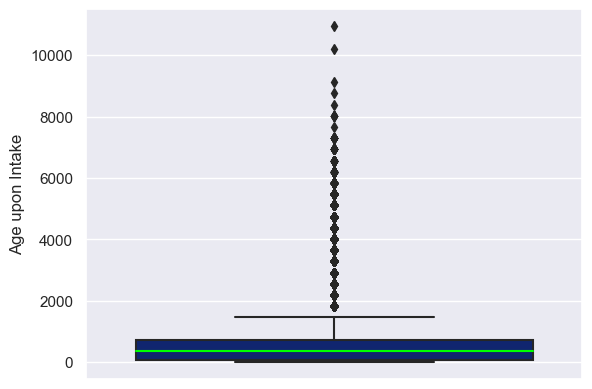

In [204]:
# intake.boxplot(column="Age upon Intake")
sns.set_theme(style='darkgrid',palette='dark')
sns.boxplot(data=intake, y="Age upon Intake",medianprops=dict(color='lime'))

Vidime, ze mame spoustu odlechlych pozorovani, coz muse ovlivnit deskriptivni statistiku. Takze odstranime je:

<AxesSubplot:ylabel='Age upon Intake'>

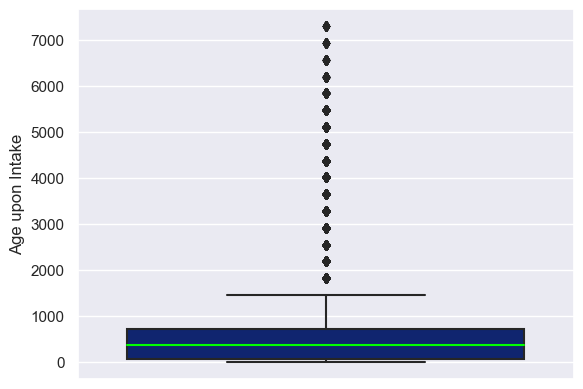

In [205]:
# The value 7300 will filter all data which count is < 100
filtered = intake[intake['Age upon Intake'] <= 7300]
sns.boxplot(data=filtered, y="Age upon Intake",medianprops=dict(color='lime'))

Ted' to uz vypada lepe. Zkusime popsat a vizualizovat

In [206]:
# This code was taken from 2 cv. and modified
# univariate descriptive statistics for continuous data
def univariate_cont_ds(df, column):
    stats_df = pd.DataFrame(np.array([ 
        ["Count", df[column].count()],
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean().__round__(6)],
        ["Median", df[column].median()],
        ["Min", df[column].min()],
        ["25%", df[column].quantile(0.25)],
        ["50%", df[column].quantile(0.50)],
        ["75%", df[column].quantile(0.75)], 
        ["Max", df[column].max()],
        ["Variance", df[column].var().__round__(6)],
        ["Std. Variation", df[column].std().__round__(6)]
    ]), columns=['Title', 'Value'])    

    # ** used with keywords of CSS to align text. hide() is used to hide indexes
    display(stats_df.style.set_properties(**{'text-align':'left'}).hide())
    
    fig1 = plt.figure(figsize=(10,6), constrained_layout=True)
    fig2 = plt.figure(figsize=(5,5), constrained_layout=True)
    ax1 = fig1.add_subplot() 
    ax2 = fig2.add_subplot()

    sns.set_theme(style='darkgrid',palette='dark')
    
    sns.histplot(data=df, x=column, kde=False, ax=ax1, bins=20)
    
    sns.boxplot(data=df, y=column, ax=ax2,medianprops=dict(color='lime'))

Title,Value
Count,138561
Range,7300.0
Average,739.501635
Median,365.0
Min,0.0
25%,60.0
50%,365.0
75%,730.0
Max,7300.0
Variance,1083225.115084


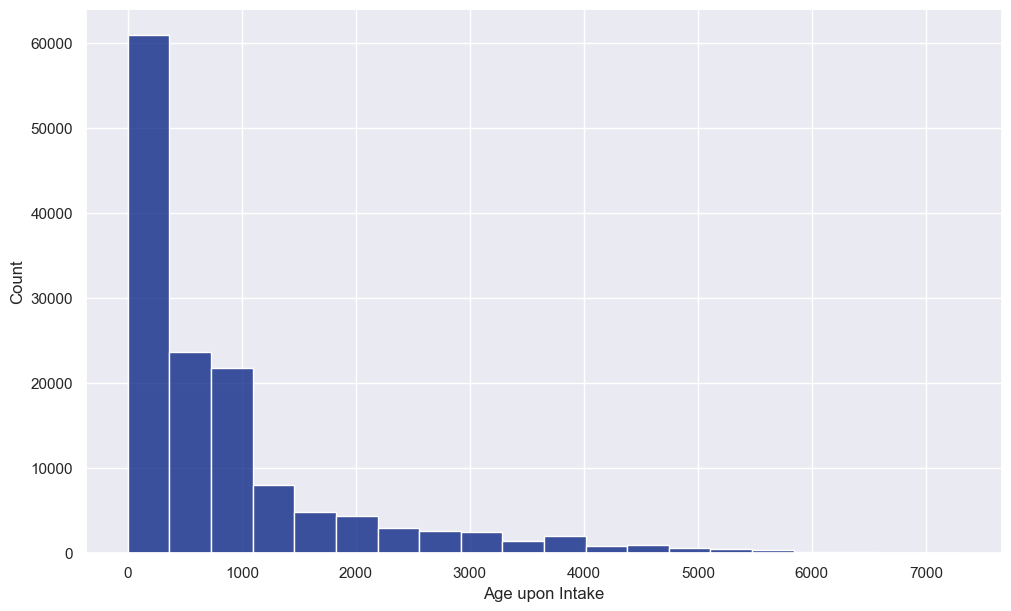

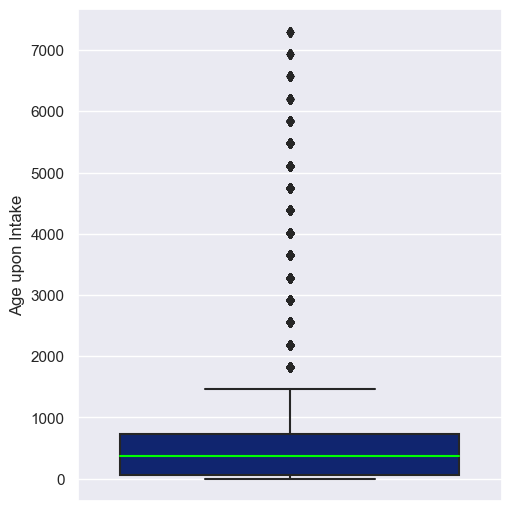

In [207]:
univariate_cont_ds(filtered,"Age upon Intake")

Jak vidime, stale mame spoustu odlehlych pozorovani, takle odfiltrujeme je a zkusime znova

Title,Value
Count,131587
Range,2920.0
Average,559.462151
Median,365.0
Min,0.0
25%,60.0
50%,365.0
75%,730.0
Max,2920.0
Variance,462410.017815


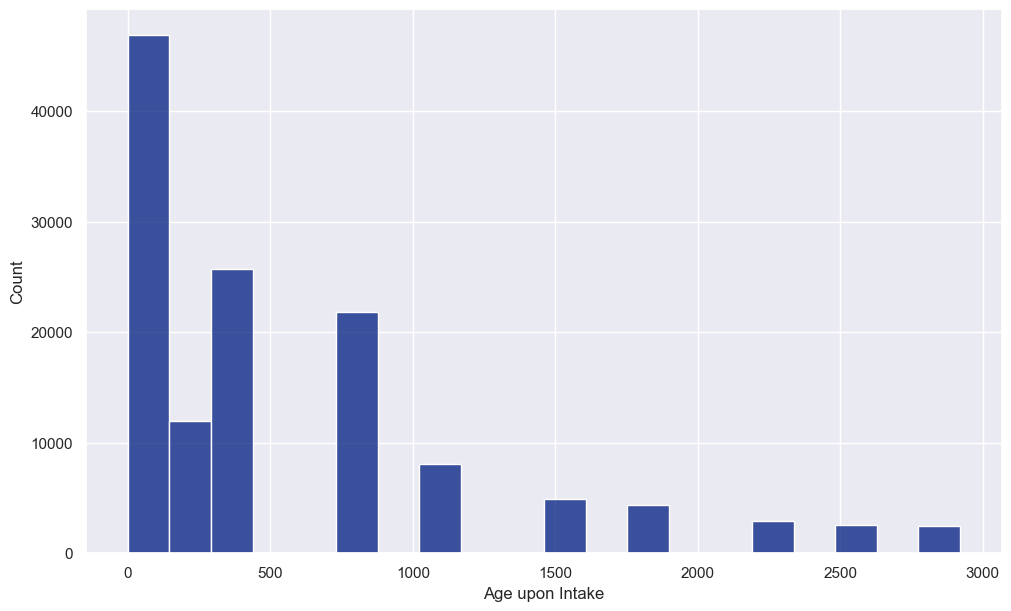

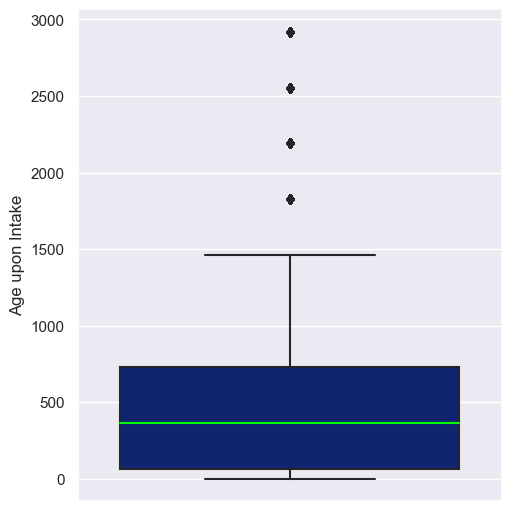

In [208]:
filtered = intake[intake['Age upon Intake'] <= 3000]

univariate_cont_ds(filtered,"Age upon Intake")

#### DateTime

2016-09-23 12:00:00    64
2014-07-09 12:58:00    63
2017-09-01 14:47:00    59
2014-02-19 13:51:00    49
2016-02-14 16:02:00    45
                       ..
2017-03-04 11:00:00     1
2015-07-09 18:53:00     1
2016-12-22 10:29:00     1
2015-11-19 17:23:00     1
2022-04-21 12:24:00     1
Name: DateTime, Length: 97440, dtype: int64

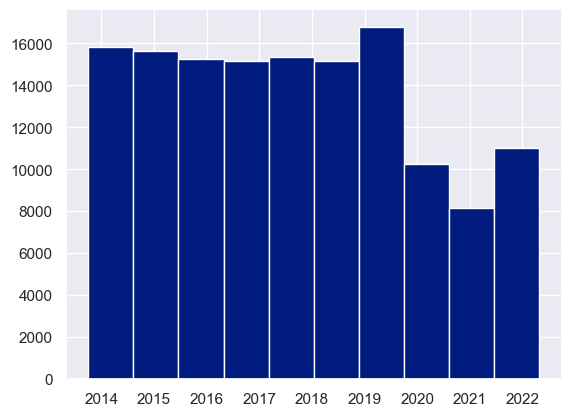

In [209]:
intake['DateTime'].hist()
display(intake['DateTime'].value_counts())

Pro datovy typ "datetime" potrebujeme neco zmenit, napriklad tento datovy typ nepodporuji variance: 

In [210]:
def univariate_cont_datetime_ds(df, column):
    stats_df = pd.DataFrame(np.array([ 
        ["Count", df[column].count()],
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Min", df[column].min()],
        ["25%", df[column].quantile(0.25)],
        ["50%", df[column].quantile(0.50)],
        ["75%", df[column].quantile(0.75)], 
        ["Max", df[column].max()],
        ["Std. Variation", df[column].std()]
    ]), columns=['Title', 'Value'])    

    display(stats_df.style.set_properties(**{'text-align':'left'}).hide())
    fig1 = plt.figure(figsize=(10,6), constrained_layout=True)
    ax1 = fig1.add_subplot()

    sns.set_theme(palette='hls')
    
    sns.histplot(data=df, x=column, kde=False, ax=ax1, bins=20)

Title,Value
Count,138581
Range,3130 days 00:03:00
Average,2017-09-03 03:48:49.731925504
Median,2017-07-20 15:44:00
Min,2013-10-01 07:51:00
25%,2015-08-12 18:29:00
50%,2017-07-20 15:44:00
75%,2019-07-08 11:17:00
Max,2022-04-27 07:54:00
Std. Variation,863 days 15:07:10.860601792


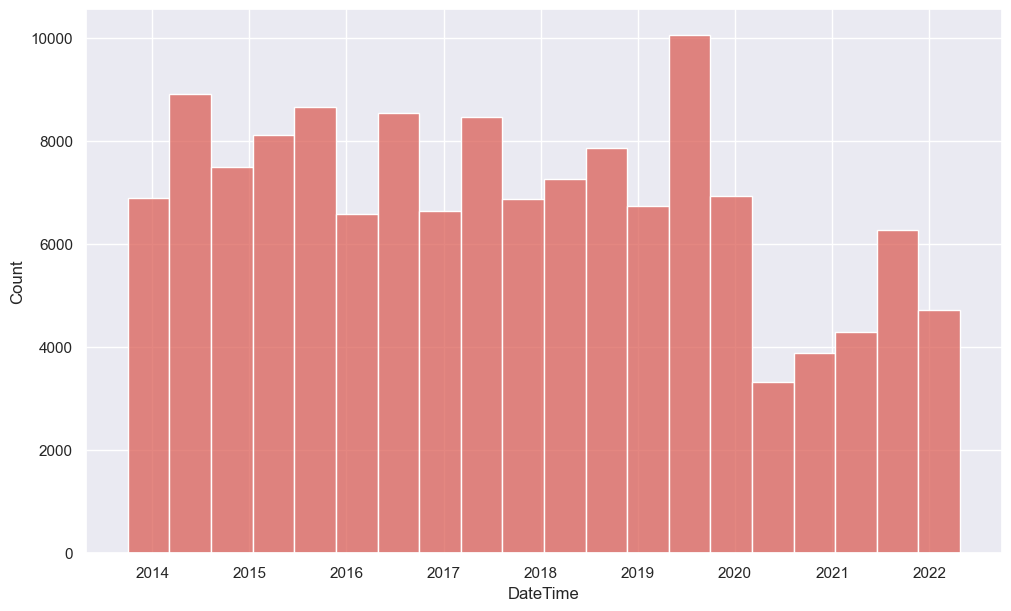

In [211]:
univariate_cont_datetime_ds(intake,"DateTime")

#### Sex upon Intake

Zkusime popsat priznak 'Sex upon Intake' pomocí univariačních deskriptivních statistik:

In [212]:
sns.set_palette('Set1')

In [213]:
def univariate_cat_ds(df, column):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True)
    })
    
    display(stats_df)
    print("Mode: {}".format(df[column].mode().values[0]))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

    sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)

    ax1.bar_label(ax1.containers[0]) # add numbers to each bar
    
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%', labeldistance=1.1)

,Frequency,Relative frequency
Intact Male,45634,0.329295
Intact Female,43304,0.312482
Neutered Male,20837,0.150360
Spayed Female,17736,0.127983
Unknown,11070,0.079881


Mode: Intact Male


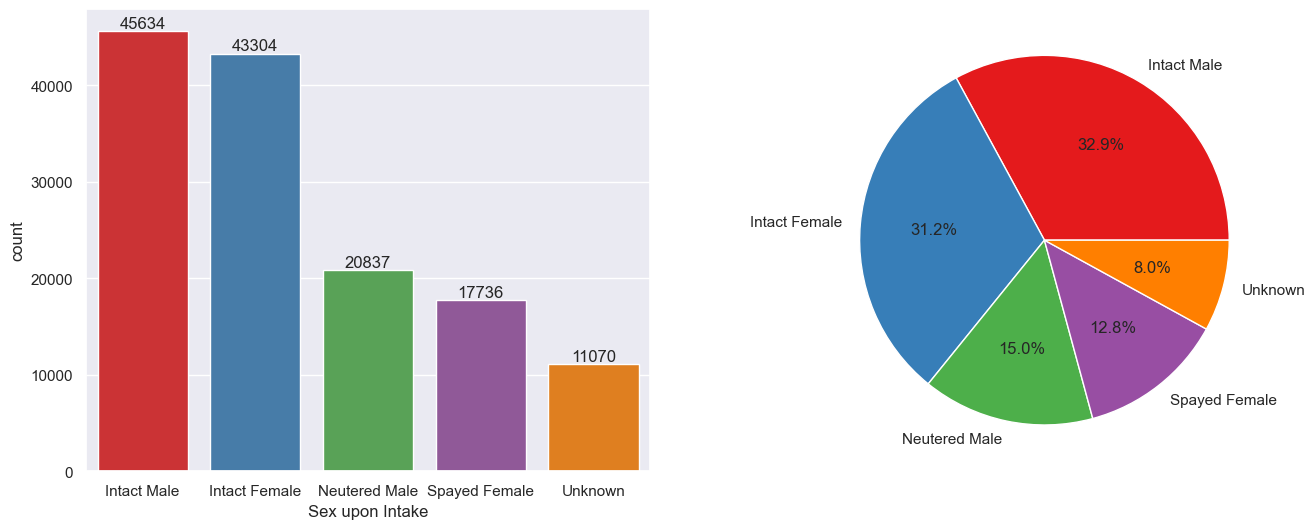

In [214]:
univariate_cat_ds(intake,'Sex upon Intake')

#### Date of Birth	

Title,Value
Count,138769
Range,11172 days 00:00:00
Average,2015-07-02 07:07:24.989875200
Median,2015-10-22 00:00:00
Min,1991-09-22 00:00:00
25%,2013-08-18 00:00:00
50%,2015-10-22 00:00:00
75%,2018-03-31 00:00:00
Max,2022-04-24 00:00:00
Std. Variation,1393 days 01:19:43.392889648


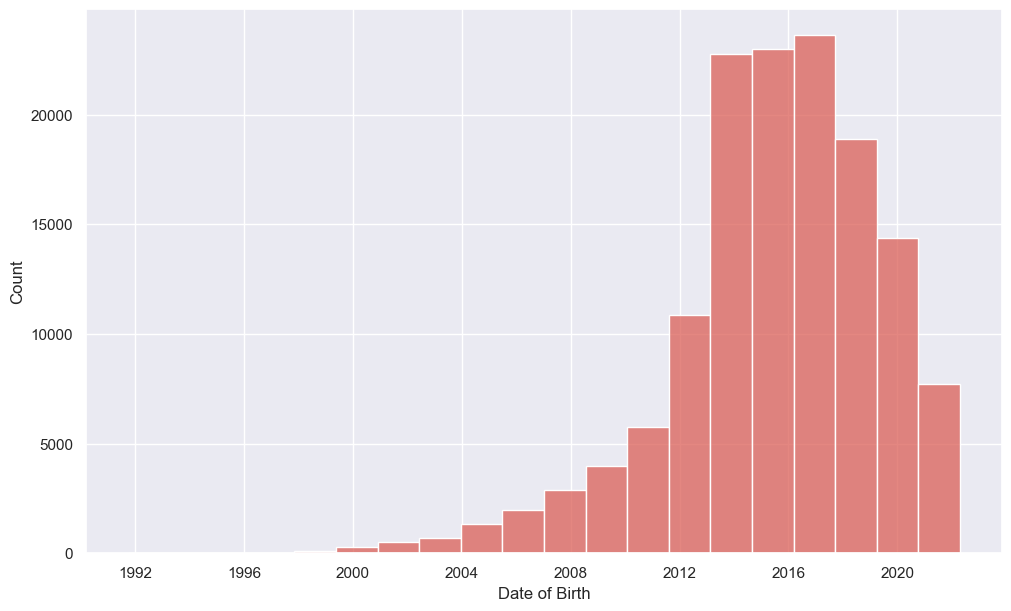

In [215]:
univariate_cont_datetime_ds(outcome,'Date of Birth')

#### Sex upon Outcome

,Frequency,Relative frequency
Neutered Male,48877,0.352218
Spayed Female,44061,0.317513
Intact Male,17637,0.127096
Intact Female,17141,0.123522
Unknown,11053,0.079650


Mode: Neutered Male


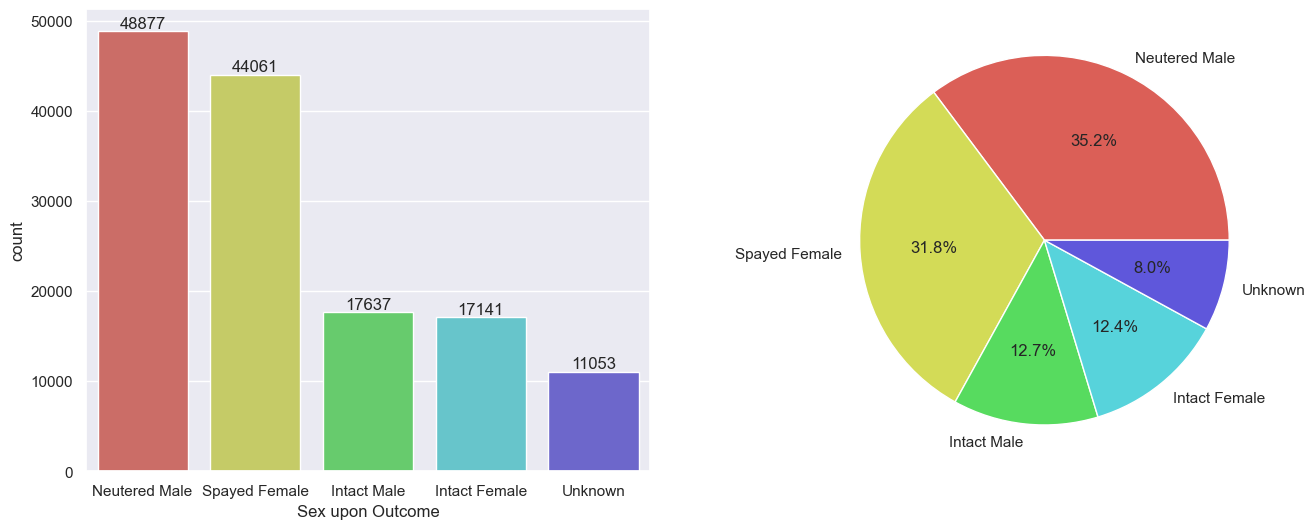

In [216]:
univariate_cat_ds(outcome,'Sex upon Outcome')

### Bivariační

Jaký vliv má typ zviratka na jeho stav po opusteni centru? 

In [217]:
def bivariate_cat_cat_ds(df1, categorical1, df2, categorical2):
    frequency_table = pd.crosstab(df1[categorical1], df2[categorical2])
    sns.heatmap(frequency_table, annot=True, fmt='g', cmap= "flare")

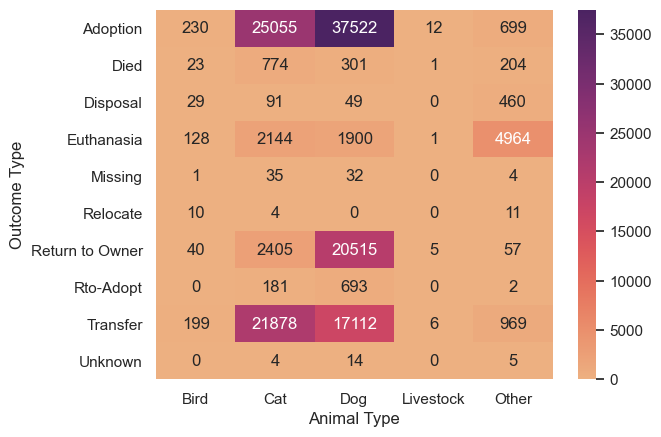

In [218]:
bivariate_cat_cat_ds(outcome,'Outcome Type', outcome, 'Animal Type')

* Z mapy je patrné, že psi jsou častěji adoptováni. Téměř stejný počet je vrácen majiteli nebo předán.  Kočky jsou nejčastěji buď adoptovány, nebo přemístěny.
* Psi jsou častěji adoptováni a vráceni majiteli než kočky. Opačný případ je u přemístěni.Kočky také častěji podléhají eutanázii nez psy.
* Za zmínku stojí, že v kategorii "Other" téměř 5 000 zvířatum byla provedena eutanázie.

## Vlastní otázky

### Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)?

Zkusime prozkoumat zavislost mezi dvoice nespojitych priznaku pomoci heatmapy: 

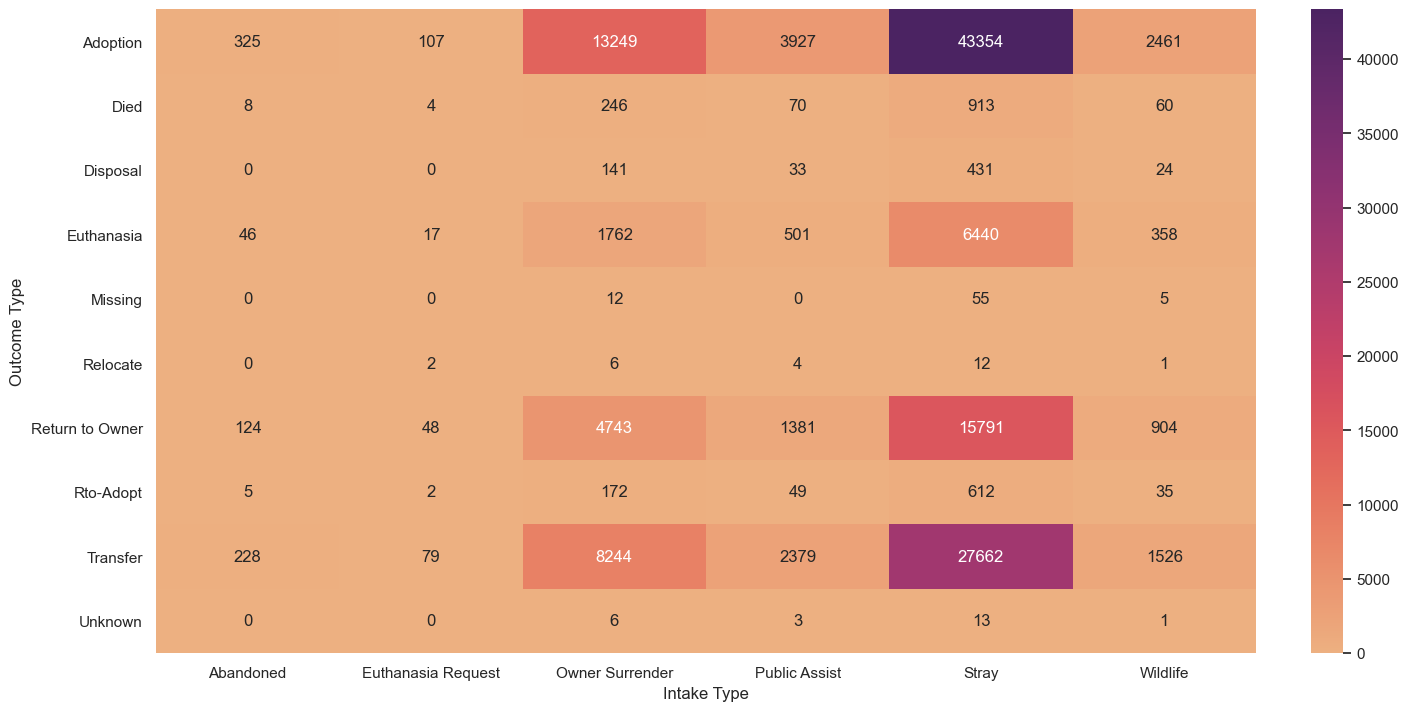

In [219]:
def heatmap(df1, categorical1, df2, categorical2):
    fig,ax1 = plt.subplots(figsize=(14,7),constrained_layout = True)

    # Compute cross tabulation between "Outcome Type" and "Intake Type"
    frequency_table = pd.crosstab(df1[categorical1], df2[categorical2])
    
    sns.heatmap(frequency_table, annot=True, fmt='g', cmap= "flare", ax=ax1)

heatmap(outcome,"Outcome Type",intake,"Intake Type")

Z mapy je videt, ze zatoulané zvire z velkou pravdepodonosti bude adaptovano. Abychom vyjadrily to presneji, pojdme podivat na trochu jiny metod - znormalizujeme hodnoty podle hodnot z Intake Type (tj. podle sloupcu): 

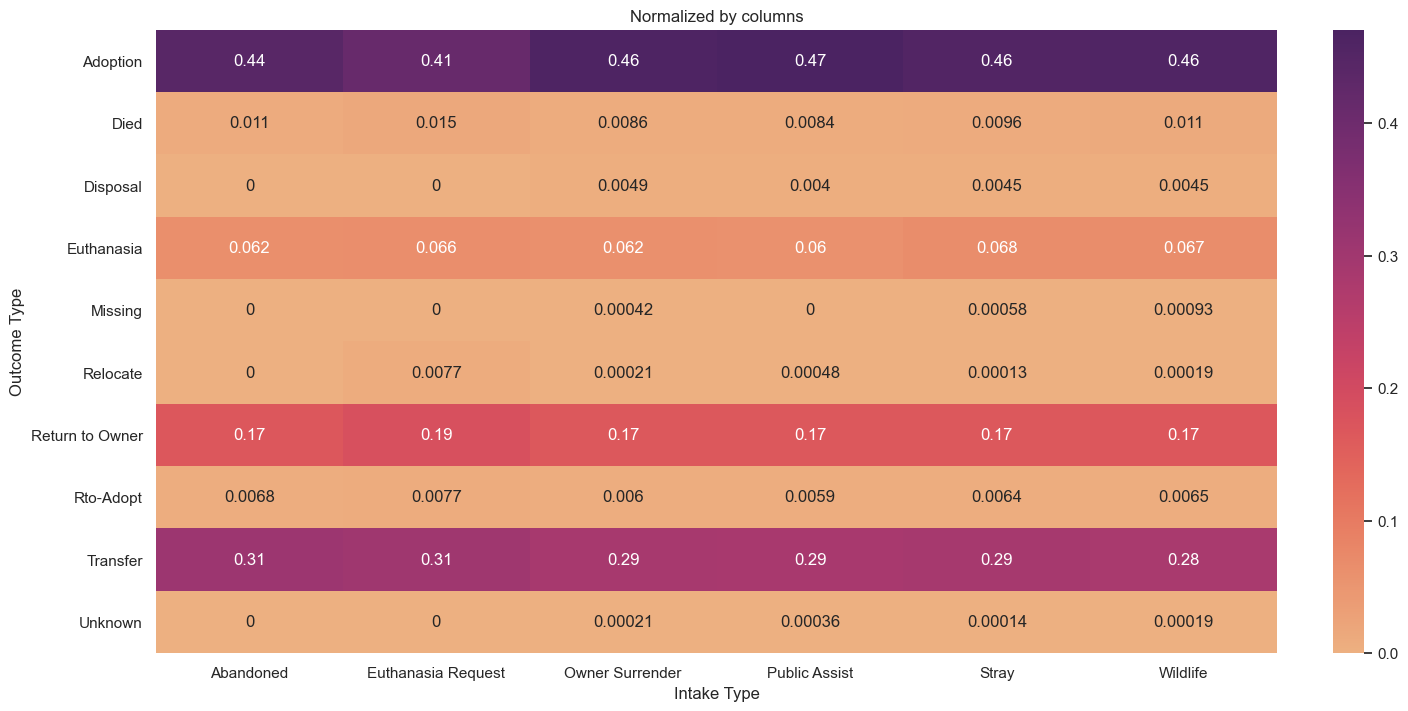

In [220]:
def heatmap_norm(df1, categorical1, df2, categorical2):
    fig,ax1 = plt.subplots(figsize=(14,7),constrained_layout = True)

    # Compute cross tabulation between "Outcome Type" and "Intake Type" with normalization over each column
    frequency_table_n = pd.crosstab(df1[categorical1], df2[categorical2],normalize='columns')

    sns.heatmap(frequency_table_n, annot=True, fmt='.2g', cmap= "flare", ax=ax1)
    ax1.set_title("Normalized by columns")

heatmap_norm(outcome,"Outcome Type",intake,"Intake Type")

Rozebereme na priklade hodnoty "Stray":
46% ze vsech zaznamu z hodnotou "Stray" ma hodnotu "Adoption", 29% ma hodnotu "Transfer", 17% - "Return to Owner" a 6% - "Euthanasia". 
To znamena, ze zatoulané zvire ma sanci (zhruba):
* 46% byt adaptovane
* 29% byt premistene
* 17% byt vracene puvodnimy vlastníkovi
* 6% na provedeni eutanazie 

Jak uz vidime, tyhle pravdepodobnosti (zrhuba) plati pro vetsinu hodnot z "Intake Type". Zajimave jsou 2 pripady:
1. Hodnota "Abandoned" - opuštěné zvíře ma sanci:
      * 44% byt adaptovane
      * 31% byt premistene
      * 17% byt vracene puvodnimy vlastníkovi
      * 6.2% na provedeni eutanazie
      * 1.1% na smrt 
2. Hodnota "Euthanasia Request" - zvíře s žádostí o eutanazii ma sanci:
      * 41% byt adaptovane
      * 31% byt premistene
      * 19% byt vracene puvodnimy vlastníkovi
      * 6.6% na provedeni eutanazie 
      * 1.5% na smrt

Takze odpoved ano, typ odchodu zvířete z útulku závisí na typu příchodu.

### Hraje věk zvířete roli při adopci?

Prozkoumame, kolikrat zvire bylo adaptovano pro kazdy unikatni vek:

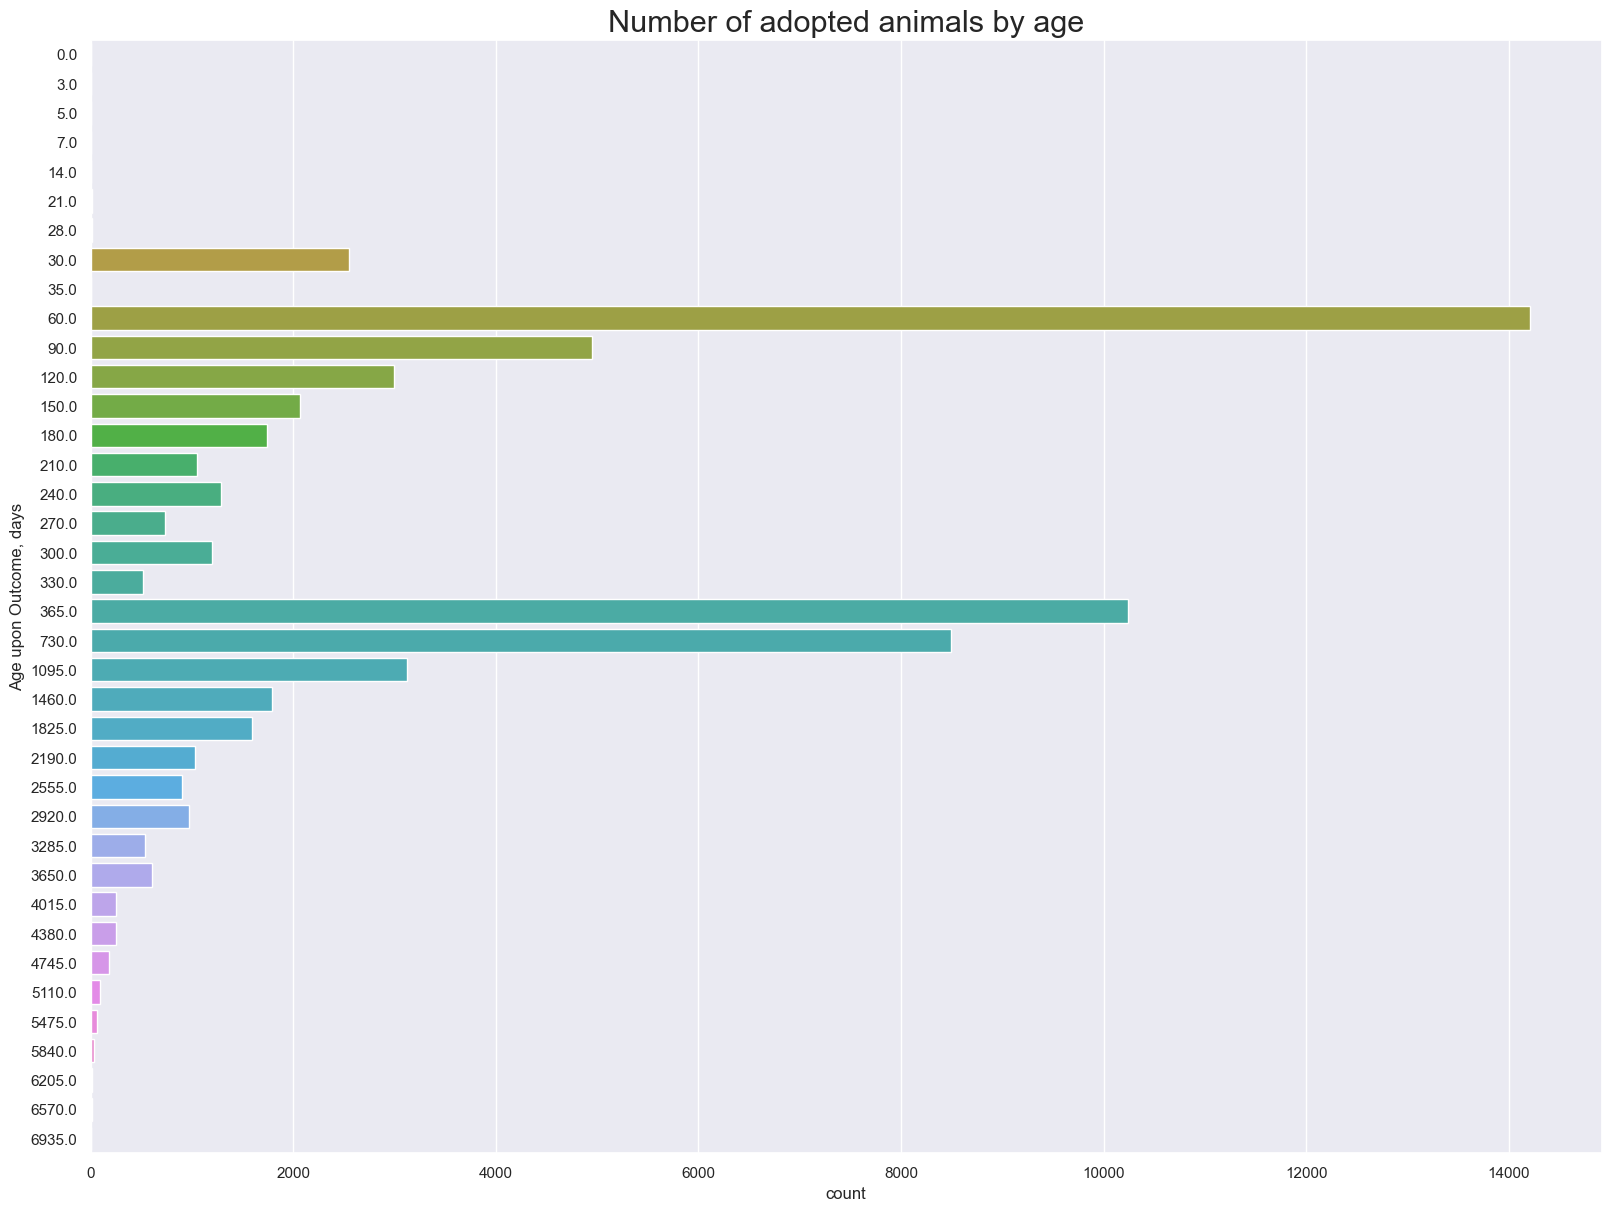

In [221]:
# Choose adopted animals
filtered = outcome[outcome['Outcome Type'] == "Adoption"]

# Order on chart by their age in ascending order
order = filtered['Age upon Outcome'].value_counts().reset_index().sort_values('index')['index']

# Draw a chart
fig, ax = plt.subplots(figsize=(16,12), constrained_layout= True)
sns.countplot(data=filtered, 
              y="Age upon Outcome", 
              order = order, 
              ax=ax)
ax.set_ylabel("Age upon Outcome, days")
_ = ax.set_title("Number of adopted animals by age",fontdict={'fontsize':22})


Jak je vidět, nejvíce byla adoptována zvířata ve věku 60 dní.
Další oblíbené věky jsou 365 dní (1 rok), 730 dní (2 roky) a 90 dní. 

Velmi málo bylo adoptováno zvířat ve věku 0 až 28 dní a 6205 až 6935 dní (tj. 17 až 19 let).

Můžeme tedy s jistotou říci, že věk zvířete hraje v procesu adopce roli.

### Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

Podívejme se, kolik zvířat bylo přijato do centra v jednotlivých měsících:

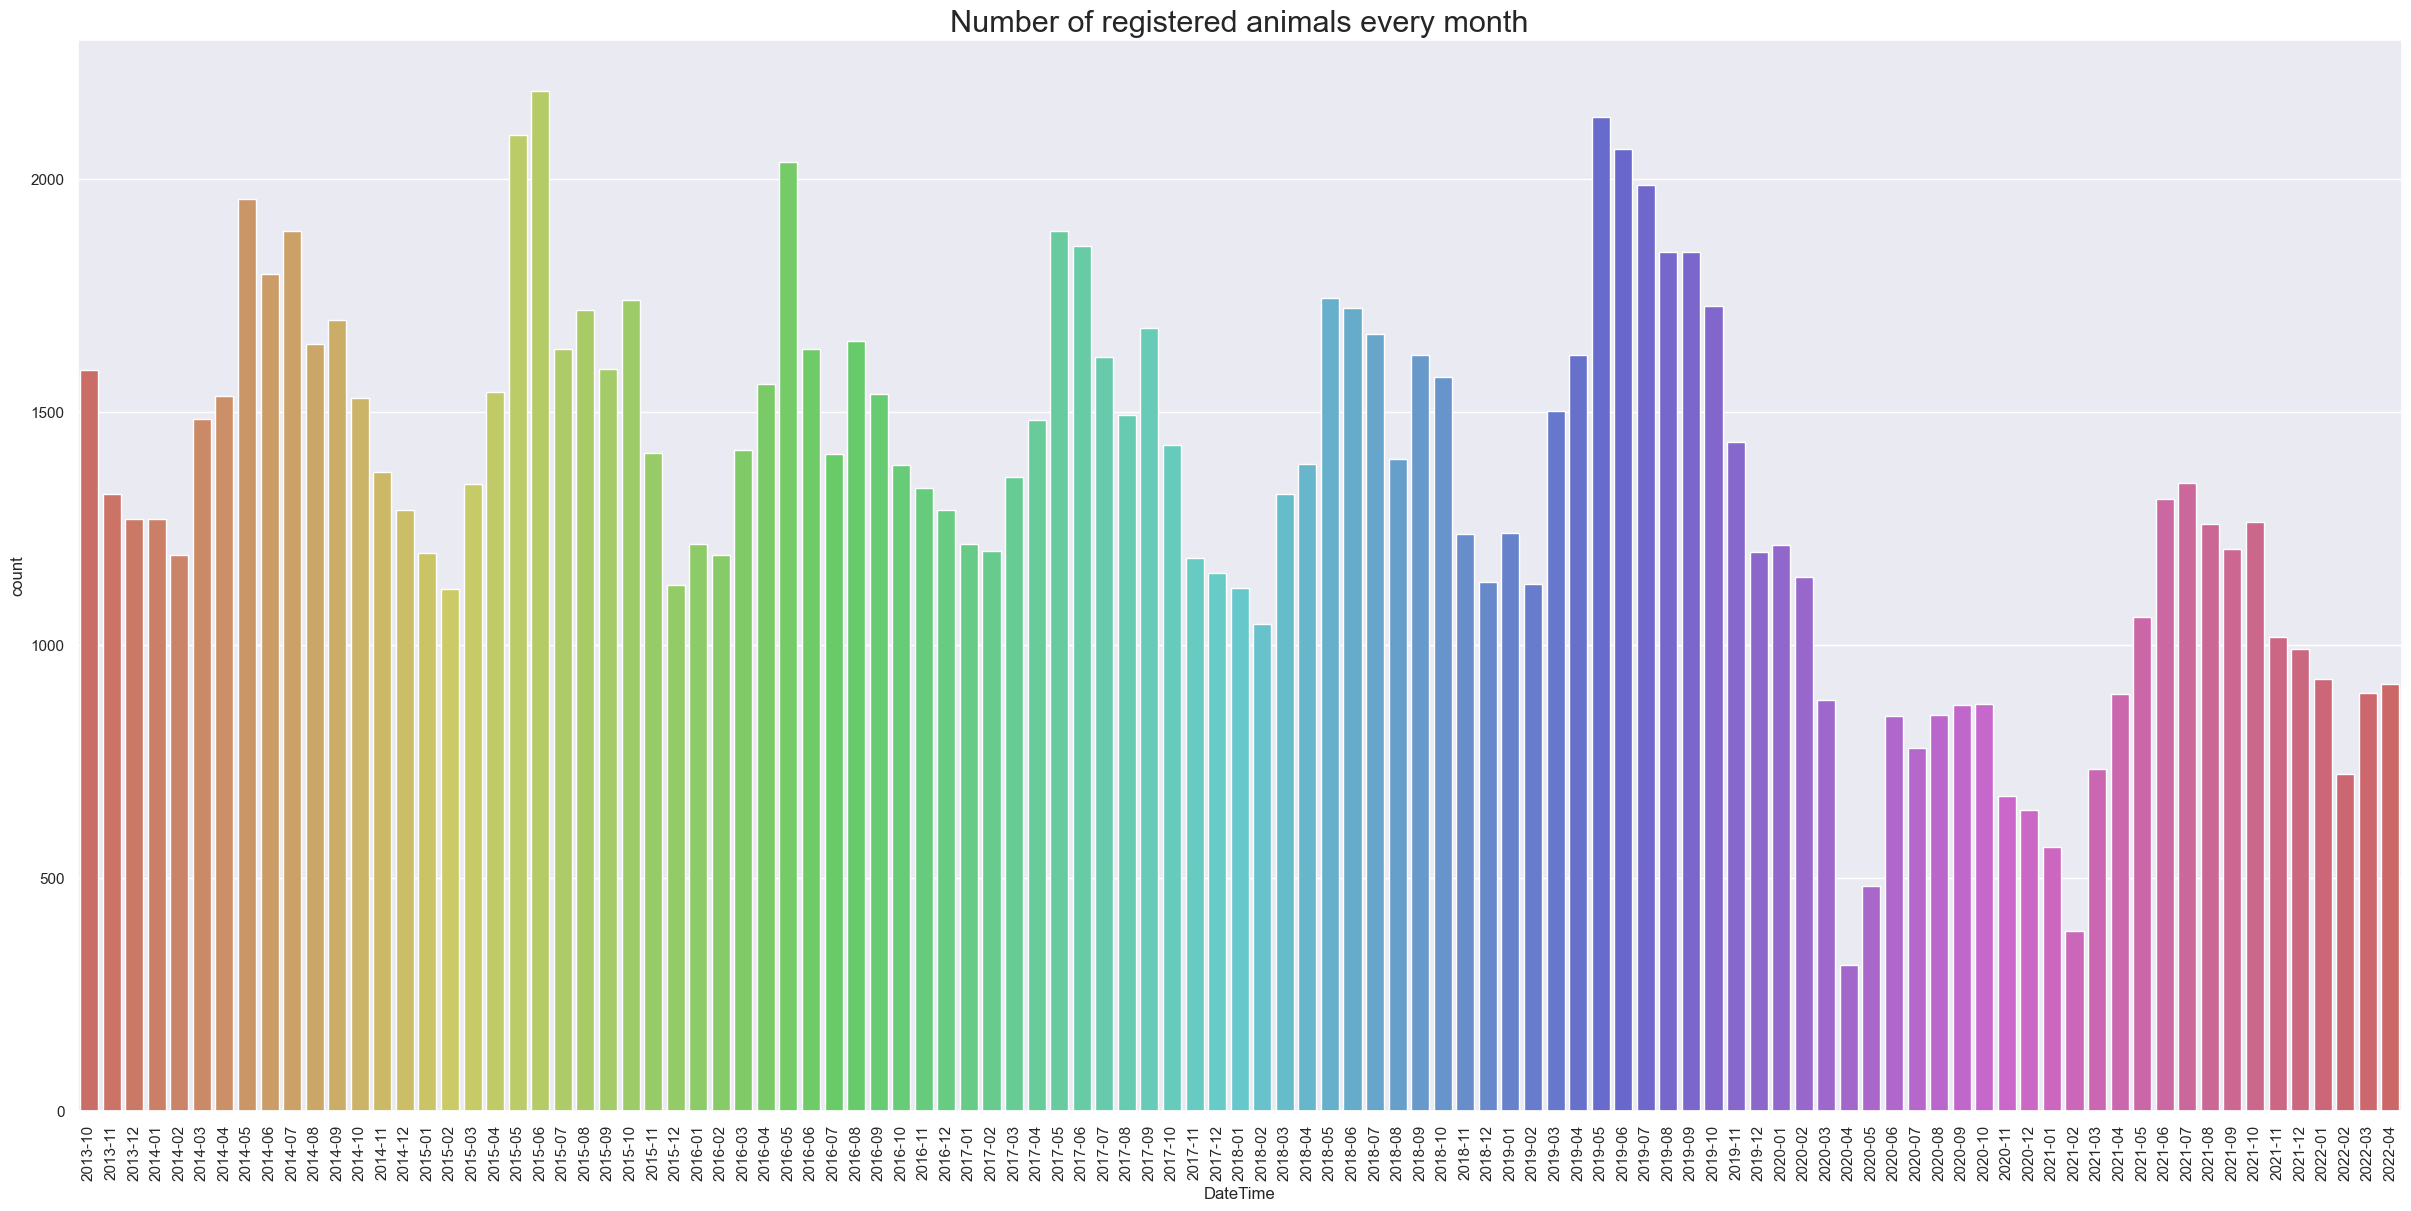

In [222]:
# Column 'MonthYear' was not so useless after all
# Well, it is about to comeback

# Copy all datastamps and reduce them to year-month (yyyy-mm)
MonthYear = intake['DateTime'].dt.to_period('M')

# Order on chart by date in ascending order
order = MonthYear.value_counts().reset_index().sort_values('index')['index']

# Draw a chart
fig, ax = plt.subplots(figsize=(24,12), constrained_layout= True)
sns.countplot(data=MonthYear, x=MonthYear, order=order, ax=ax,palette="hls")
ax.set_title("Number of registered animals every month",fontdict={'fontsize':22})

# Rotate labels of ticks for readability
ax.xaxis.set_tick_params(rotation=90)

Vidime ze, větší zátěží se obvykse stava v 5 (kveten) a 6 (cerven) mesicu, nižší zátěží - v 1 (leden) a 2 (únor) mesicu. 

V roce 2020 (kdy kovid začal) se počet zaznamenaných zvířat dramaticky snížil, přičemž nejrušnějšími měsíci byly 1 (leden) a 2 (únor) (pravděpodobně před masovým rozšířením viru). Nejklidnější měsíce byly 4 (duben) a 5 (květen).

V roce 2021 větší zátěží nastala v 6 (cerven) a 7 (cervenec) mesicu. 

### Top 10 plemen adaptovanych zvirat

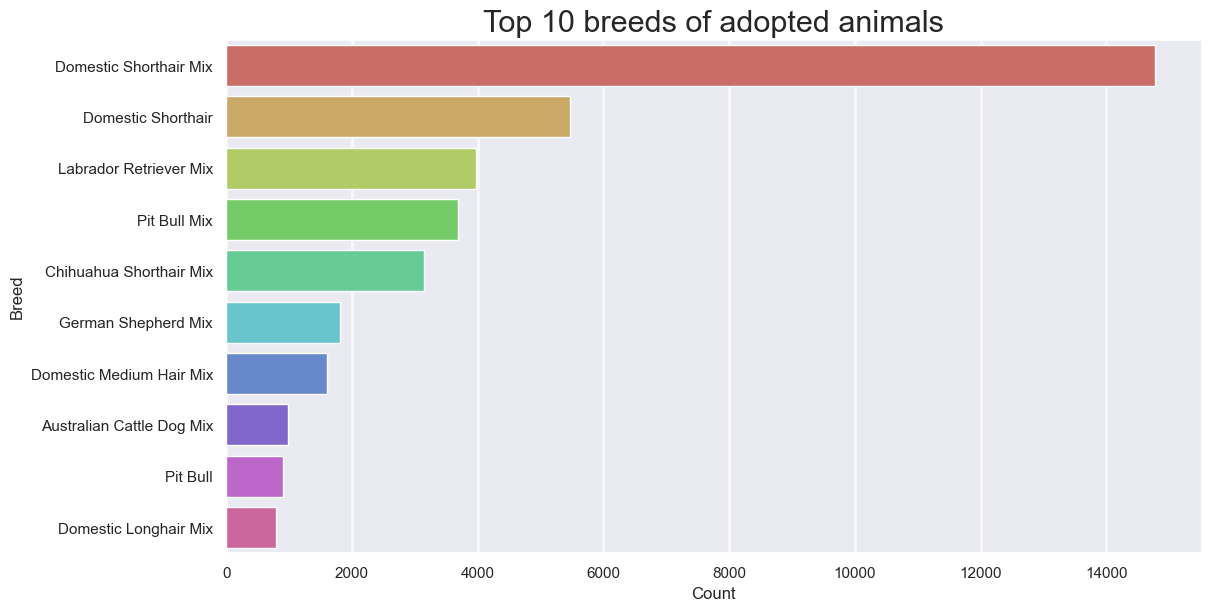

In [223]:
# Number of breeds of all adopted animals
df = outcome[outcome['Outcome Type'] == "Adoption"]['Breed'].value_counts()

# Reduce to first 10 breeds
df = df[:10].reset_index().rename(columns={"index":"Breed","Breed":"Count"})

fig, ax = plt.subplots(figsize=(12,6), constrained_layout=True)
sns.barplot(y=df['Breed'],x=df['Count'], ax=ax,palette="hls")

ax.set_title("Top 10 breeds of adopted animals",fontdict={"fontsize":22})

ax.grid(axis="x",alpha=.7,linewidth=2)

Jak vidime, nejpopulárnější plemeno je "Domestic Shorthair Mix"

### Kolik koček a psů bylo přijato do střediska v roce 2021? (v každém měsíci)

In [ ]:
# Dogs in year 2021
dog = (intake[intake['Animal Type'] == "Dog"] 
       [(intake['DateTime']>=pd.to_datetime('2021-01-01 00:00:00')) & (intake['DateTime']<=pd.to_datetime('2022-01-01 00:00:00'))]
       [['Animal Type','DateTime']]
      )
# Reduce precision of datetime to year-month
dog['DateTime'] = dog['DateTime'].dt.to_period('M')

# Cats in year 2021
cat = (intake[intake['Animal Type'] == "Cat"]
             [(intake['DateTime']>=pd.to_datetime('2021-01-01 00:00:00')) & (intake['DateTime']<=pd.to_datetime('2022-01-01 00:00:00'))]
             [['Animal Type','DateTime']]
      )
# Reduce precision of datetime to year-month
cat['DateTime'] = cat['DateTime'].dt.to_period('M')

# number of dogs and cats for each month in 2021 year
data_dog = dog['DateTime'].value_counts().reset_index().sort_values('index')
data_cat = cat['DateTime'].value_counts().reset_index().sort_values('index')

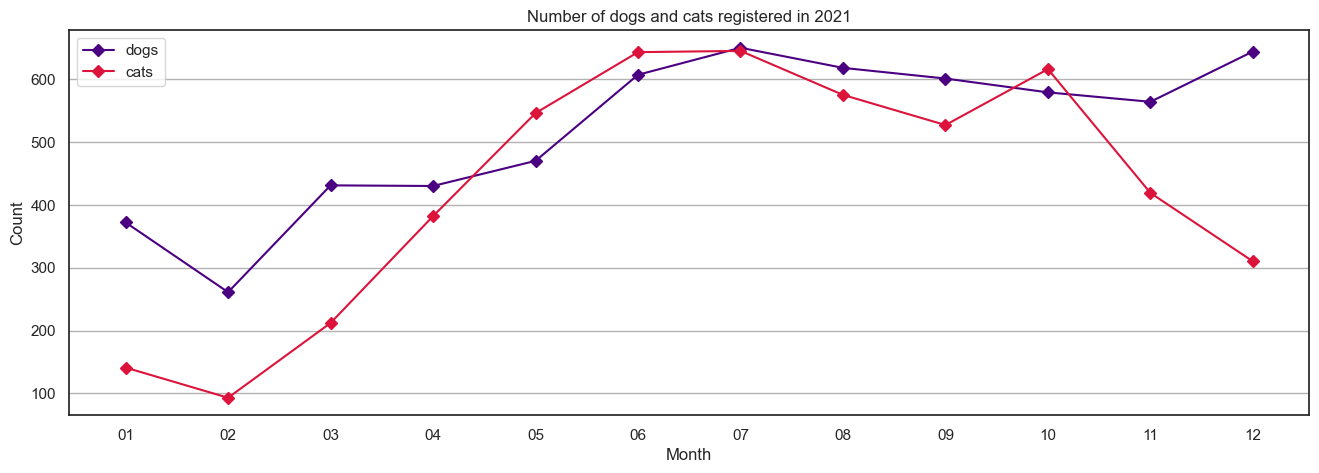

In [225]:
sns.set_style('white')

fig, ax = plt.subplots(figsize=(16,5))

# Transform all datestamps to string, leave only month number
ax.plot(data_dog['index'].apply(lambda x:str(x).split("-")[1]), data_dog['DateTime'], 'D-', color='indigo', label='dogs')
ax.plot(data_cat['index'].apply(lambda x:str(x).split("-")[1]), data_cat['DateTime'], 'D-', color='crimson', label='cats')

#set up grid
ax.grid(axis='y', color='black', alpha= .3, linewidth=1)

ax.set_ylabel('Count')
ax.set_xlabel('Month')

ax.set_title('Number of dogs and cats registered in 2021')
_ = ax.legend()

### Kolik zvířat, která přišla do centra nemocná, v historii centra uhynulo? Ve kterém měsíci uhynulo nejvíce zvířat?

In [226]:
# Dead animals
df1 = outcome[outcome['Outcome Type'] == "Died"][['Animal ID','DateTime']]

# Sick animals
df2 = intake[intake['Intake Condition'] == "Sick"][['Animal ID','DateTime']]

# Reduce date precision to month
df1['DateTime'] = df1['DateTime'].dt.to_period('M')
df2['DateTime'] = df2['DateTime'].dt.to_period('M')

# Sick AND Dead animals
filtered = df1.merge(df2)

# Number of each date whis is present in dataset
MonthYear = intake['DateTime'].dt.to_period('M').value_counts()

# Preparation for plotting
MonthYear = MonthYear.reset_index().rename(columns={"index":"DateTime","DateTime":"0"}).drop(columns="0")

Total number of deaths: 191


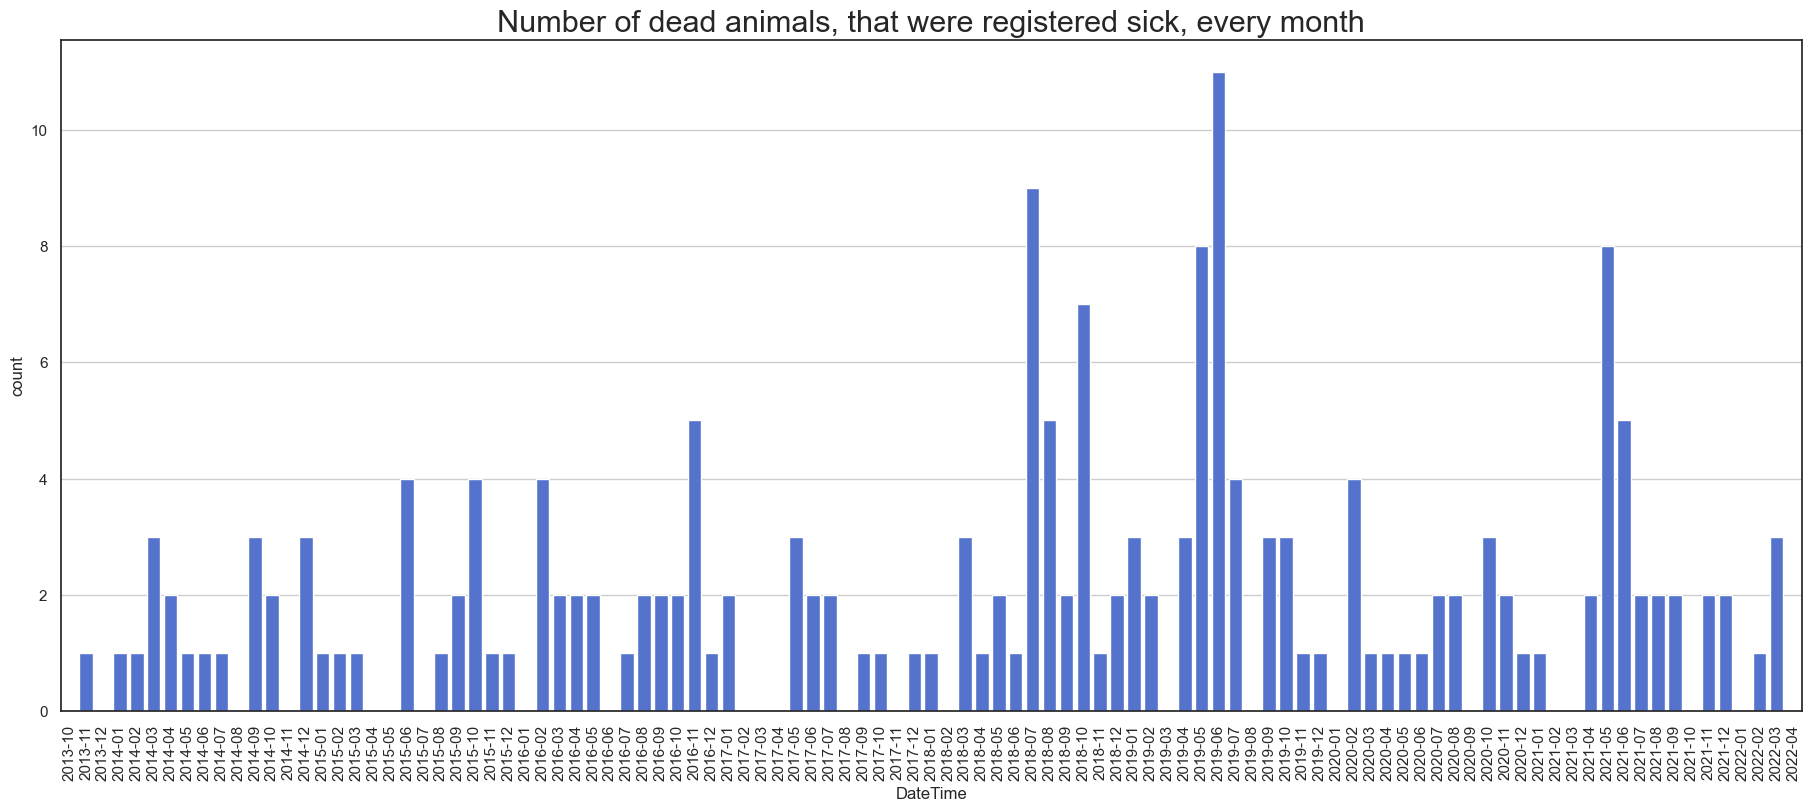

In [227]:
# Order by all available dates, ascending
order = MonthYear.sort_values('DateTime')['DateTime']

print("Total number of deaths: {}".format(len(filtered)))

# Draw a chart
fig, ax = plt.subplots(figsize=(18,8), constrained_layout= True)
sns.countplot(data=filtered, x="DateTime", order= order, ax= ax,color="royalblue")
ax.set_title("Number of dead animals, that were registered sick, every month",fontdict={'fontsize':22})

ax.grid(axis='y', color='black', alpha=.2, linewidth=1)

# Rotate labels of ticks for readability
ax.xaxis.set_tick_params(rotation=90)

Z chartu vidime, ze nejvic zvirat uhynulo v cervnu 2019 roku - 11 zvirat